# Problem Statement

This dataset is created for the prediction of Graduate admissions from an Indian perspective. The dataset contains various features that are important during the application for the Master's Program. The predicted output obtained from the classification algorithm gives a fair idea about the chances of a student for admission.

# About the dataset (Graduate admissions prediction data)

Serial No.: Serial number of student

GRE Scores: GRE score (out of 340)

TOEFL Scores: TOEFL score (out of 120)

University Rating: University rating (out of 5)

SOP: Strength of Statement of Purpose (out of 5)

LOR: Strength of Letter of Recommendation (out of 5)

CGPA: Undergraduate CGPA (out of 10)

Research: Research experience (either 0 or 1)

Chance of Admit: Chance of admission (target/dependent variable)

In [65]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns
# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 
# Linear Regression Model 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import random
from sklearn import metrics

# import various functions from sklearn 
from sklearn import metrics


#  Load Data

In [30]:
# load the csv file
# store the data in 'df_admissions'
df = pd.read_csv("C://Users//Dipali//Documents//admission_data.csv")

# display first five observations using head() 
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.500000,4.500000,9.650000,1,0.920000
1,324,107,4,4.000000,4.500000,8.870000,1,0.760000
2,316,104,3,3.000000,3.500000,8.000000,1,0.720000
3,322,110,3,3.500000,2.500000,8.670000,1,0.800000
4,314,103,2,2.000000,3.000000,8.210000,0,0.650000


# Clean data - Feature Engineering

In [67]:
## first we can chek our data info using info function:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [68]:
# first we check our columns name using df.columns function:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [69]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [70]:
# checking the null values
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

# PERFORM EXPLORATORY DATA ANALYSIS 


In [34]:
# Statistical summary of the dataframe
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,316.472000,107.192000,3.114000,3.374000,3.484000,8.576440,0.560000,0.721740
std,11.295148,6.081868,1.143512,0.991004,0.925450,0.604813,0.496884,0.141140
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.127500,0.000000,0.630000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.560000,1.000000,0.720000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.040000,1.000000,0.820000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [41]:
df.corr()

# dataframe.corr() is used to find the pairwise correlation of all columns in the dataframe. 
# Any na values are automatically excluded. For any non-numeric data type columns in the dataframe 
# it is ignored.

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


<AxesSubplot:>

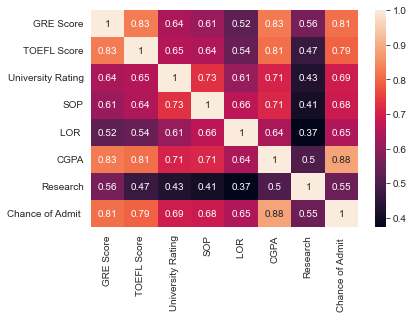

In [42]:
 sns.heatmap(df.corr(),annot=True)

# now you can simple check out correlation between x and y variables:

<AxesSubplot:xlabel='CGPA', ylabel='Density'>

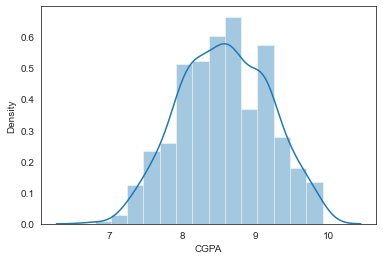

In [44]:
sns.distplot(df['CGPA'])

<AxesSubplot:xlabel='CGPA', ylabel='Chance of Admit '>

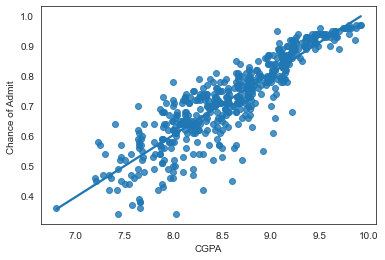

In [46]:
sns.regplot(x='CGPA',y='Chance of Admit ',data=df,ci=None)

<AxesSubplot:xlabel='GRE Score', ylabel='Chance of Admit '>

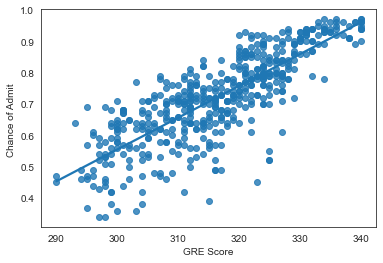

In [47]:
sns.regplot(x='GRE Score',y='Chance of Admit ',data=df,ci=None)

<AxesSubplot:xlabel='TOEFL Score', ylabel='Chance of Admit '>

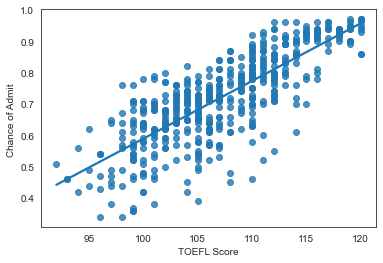

In [49]:
sns.regplot(x='TOEFL Score',y='Chance of Admit ',data=df,ci=None)

In [35]:
# Grouping by University ranking 
df_university = df.groupby(by = 'University Rating').mean()
df_university

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
1,304.911765,100.205882,1.941176,2.426471,7.798529,0.294118,0.562059
2,309.134921,103.444444,2.682540,2.956349,8.177778,0.293651,0.626111
3,315.030864,106.314815,3.308642,3.401235,8.500123,0.537037,0.702901
4,323.304762,110.961905,4.000000,3.947619,8.936667,0.780952,0.801619
5,327.890411,113.438356,4.479452,4.404110,9.278082,0.876712,0.888082


# PERFORM DATA VISUALIZATION

array([[<AxesSubplot:title={'center':'GRE Score'}>,
        <AxesSubplot:title={'center':'TOEFL Score'}>,
        <AxesSubplot:title={'center':'University Rating'}>],
       [<AxesSubplot:title={'center':'SOP'}>,
        <AxesSubplot:title={'center':'LOR '}>,
        <AxesSubplot:title={'center':'CGPA'}>],
       [<AxesSubplot:title={'center':'Research'}>,
        <AxesSubplot:title={'center':'Chance of Admit '}>,
        <AxesSubplot:>]], dtype=object)

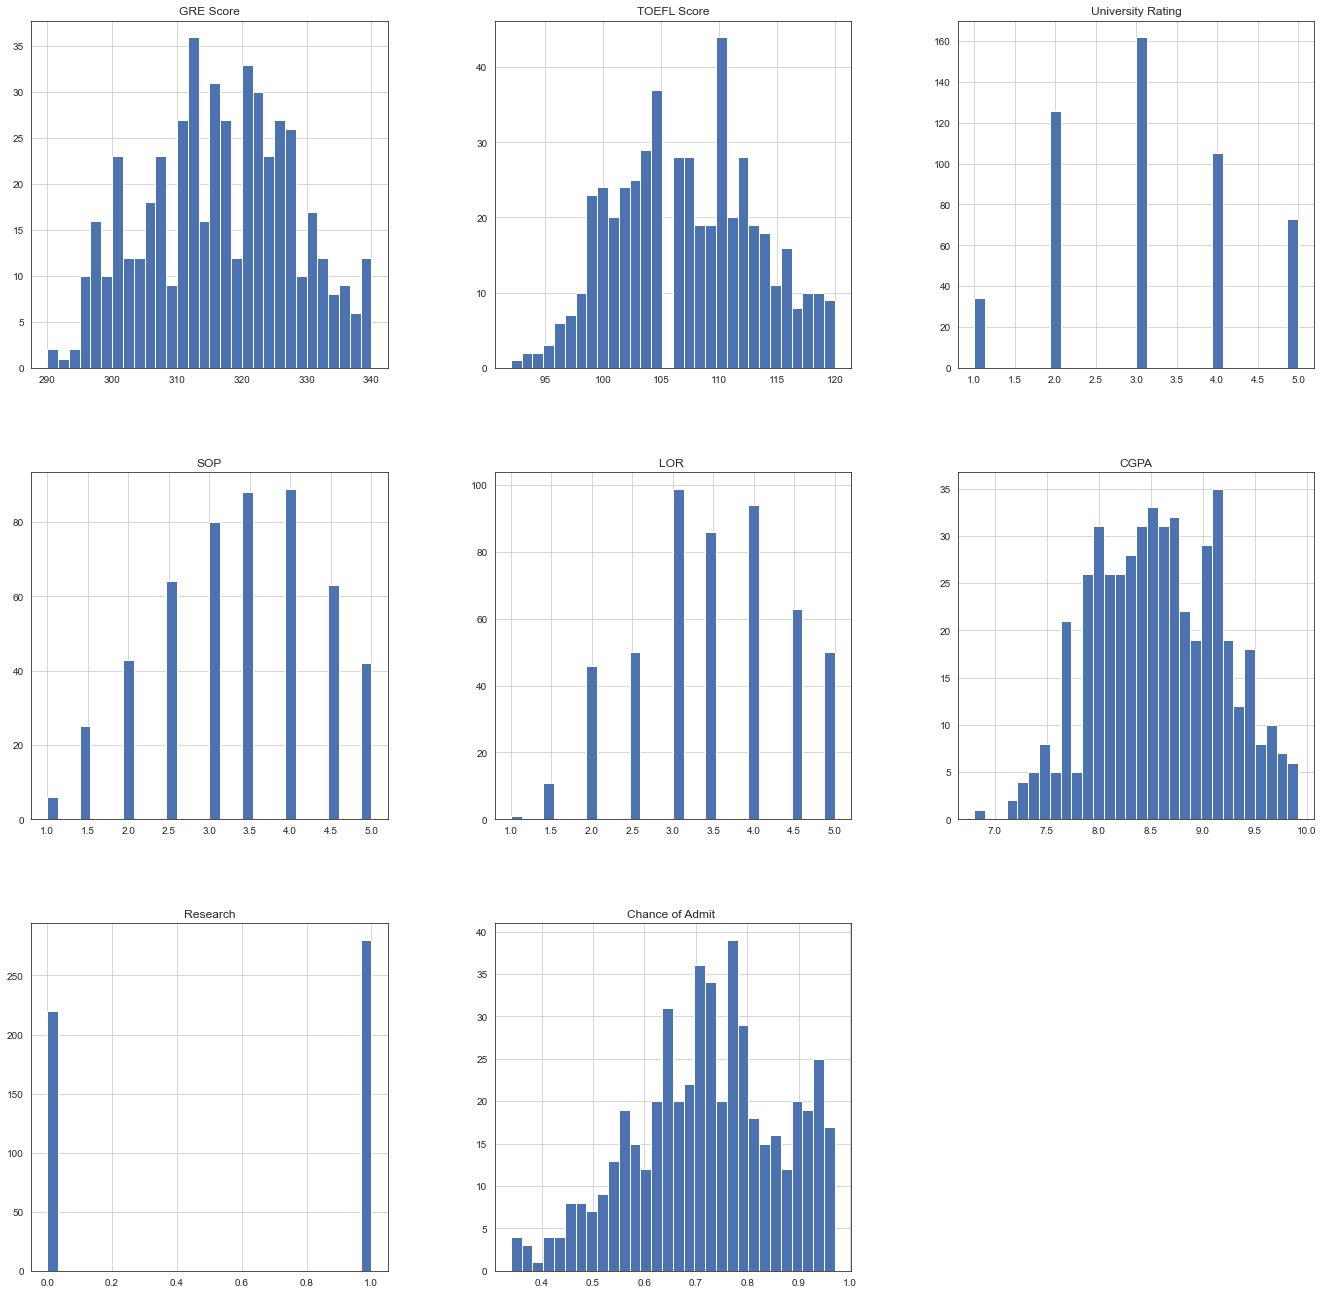

In [36]:
df.hist(bins = 30, figsize = (23, 23), color='b')

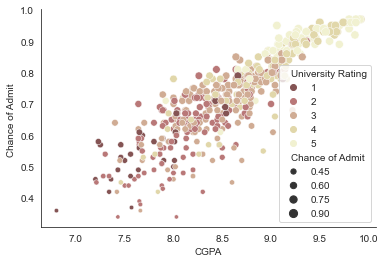

In [37]:
#plt.figure(figsize=(8,10))
#sns.set_style({"figure.facecolor": "white",})
sns.scatterplot(x='CGPA',y='Chance of Admit ',data=df,size='Chance of Admit ',palette=sns.color_palette("pink",5),hue='University Rating')
sns.despine()

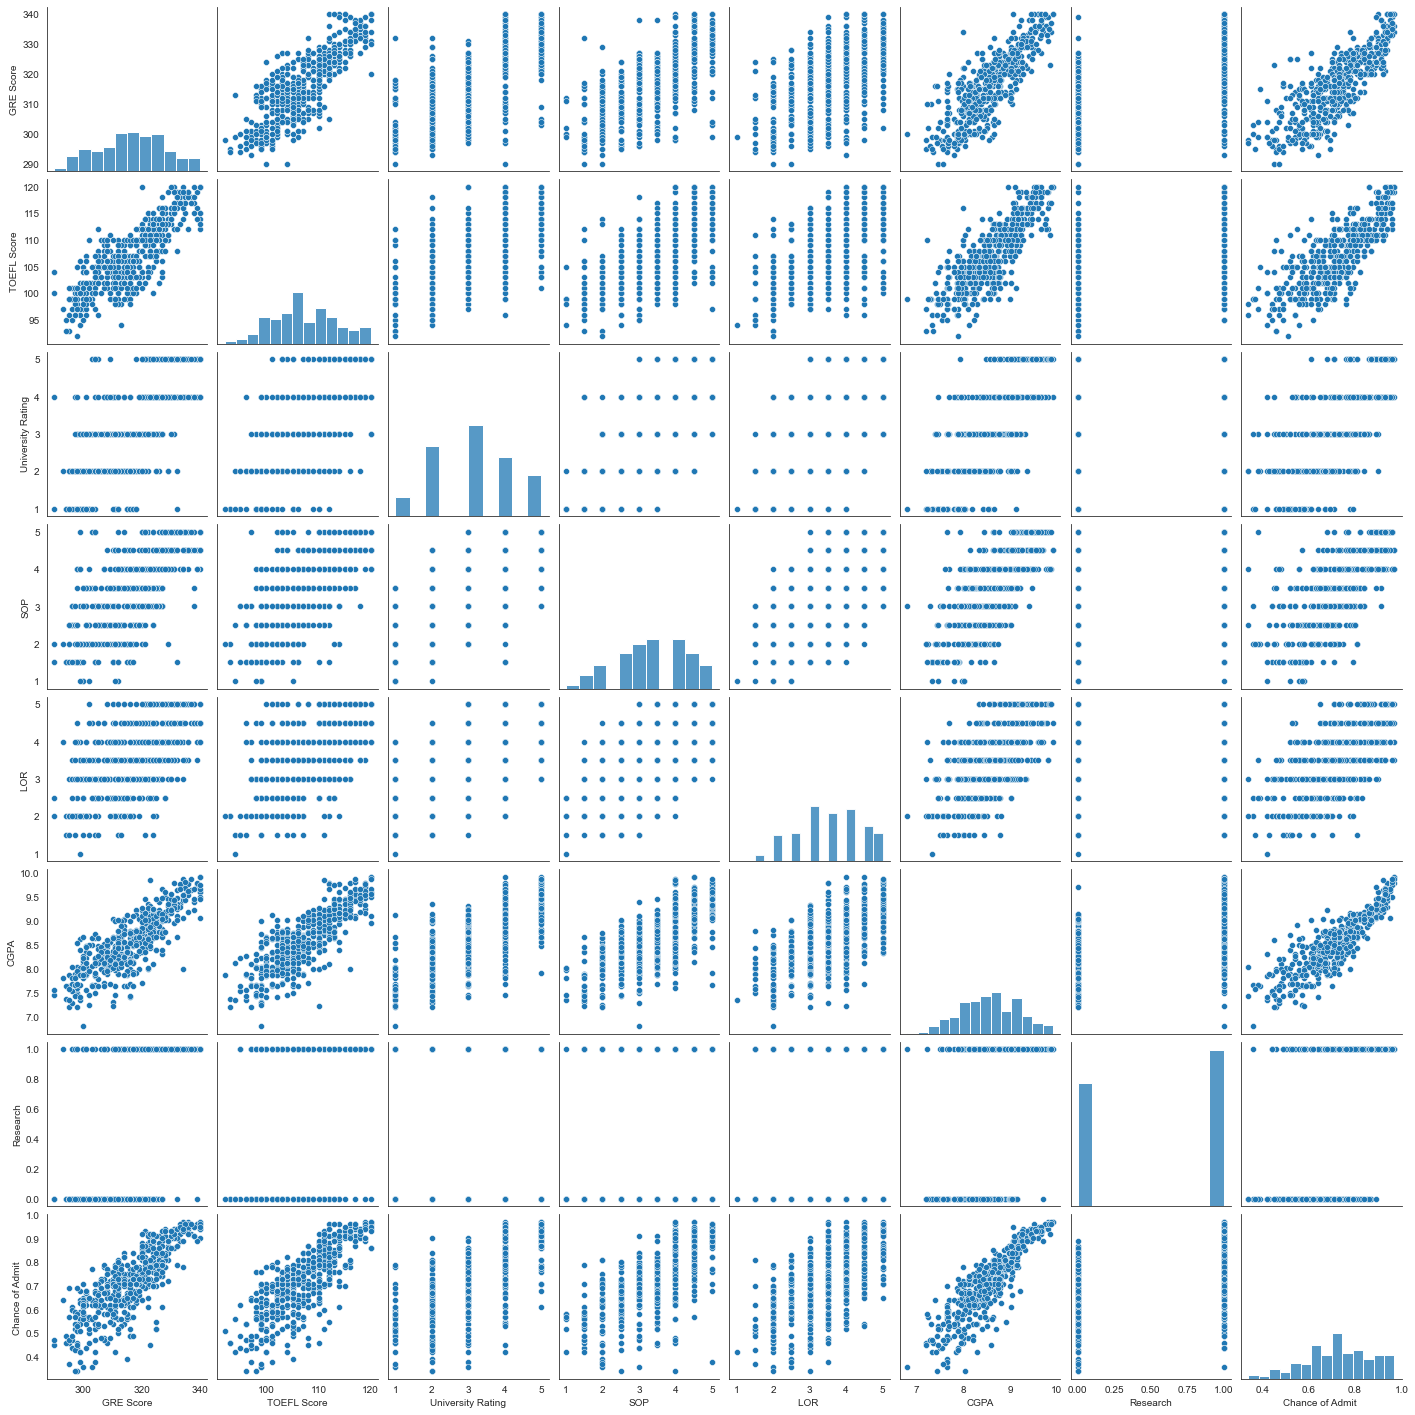

In [38]:
sns.pairplot(df)

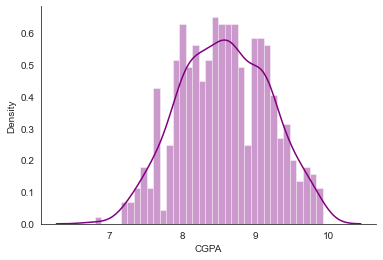

In [39]:
sns.set_style('white')
sns.set_color_codes()
sns.distplot(df.CGPA,bins=35, color="purple")
sns.despine()

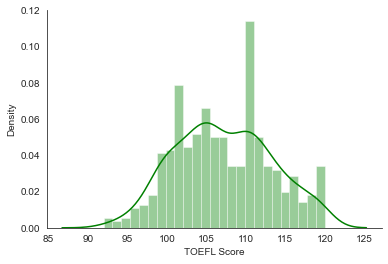

In [40]:
sns.set_style('white')
sns.set_color_codes()
sns.distplot(df['TOEFL Score'],bins=25, color="green")
sns.despine()

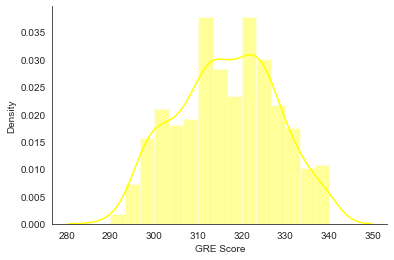

In [17]:
sns.set_style('white')
sns.set_color_codes()
sns.distplot(df['GRE Score'],bins=15, color="yellow")
sns.despine()

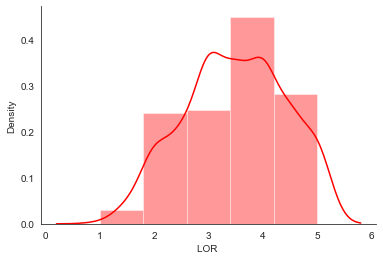

In [18]:
sns.set_style('white')
sns.set_color_codes()
sns.distplot(df['LOR '],bins=5, color="red")
sns.despine()

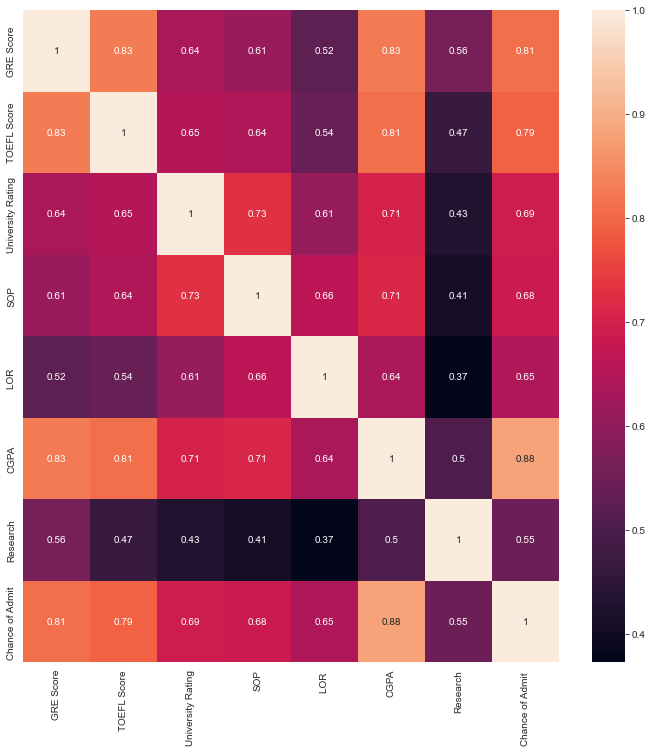

In [19]:
corr_matrix = df.corr()
plt.figure(figsize=(12,12,))
sns.heatmap(corr_matrix, annot=True)
plt.show()

# CREATE TRAINING AND TESTING DATASET¶


In [25]:
# change the data type of 'Research'
df['Research'] = df['Research'].astype(object)

In [26]:
# recheck the data types using 'dtypes'
df.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research              object
Chance of Admit      float64
dtype: object

# Creating a Linear Regression Model

In [50]:
x = df[['CGPA','GRE Score','TOEFL Score']]

In [51]:
y = df[['Chance of Admit ']]

In [52]:
# Split data for test and train the model.
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0,test_size=.20)

In [53]:
# x shape
x.shape

(500, 3)

In [54]:
# x_train shape 80% of data from x - 20% other data for test
x_train.shape

(400, 3)

In [55]:
# x_train first five rows:
x_train.head()

,CGPA,GRE Score,TOEFL Score
107,9.460000,338,117
336,8.790000,319,110
71,9.760000,336,112
474,7.950000,308,105
6,8.200000,321,109


In [57]:
# Linear Regression Model 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import random
from sklearn import metrics

# Train Linear Regression Model

In [58]:
#object
linreg = LinearRegression()

In [59]:
# fiting our data for training
linreg.fit(x_train,y_train)

LinearRegression()

# Test Linear Regression Model

In [60]:
# our model is ready to predict y.
y_predict = linreg.predict(x_test)

In [61]:
# our model prediction
y_predict[:10]

array([[0.62802152],
       [0.83209435],
       [0.79119818],
       [0.85046086],
       [0.60222891],
       [0.66888863],
       [0.55297329],
       [0.68293116],
       [0.55296602],
       [0.7583334 ]])

In [62]:
# y predict
y_predict[:10]

array([[0.62802152],
       [0.83209435],
       [0.79119818],
       [0.85046086],
       [0.60222891],
       [0.66888863],
       [0.55297329],
       [0.68293116],
       [0.55296602],
       [0.7583334 ]])

# Find Model Acuracy : Evaluating the performance

In [63]:
# y test
y_test[:10]

,Chance of Admit
90,0.640000
254,0.850000
283,0.800000
445,0.910000
461,0.680000
15,0.540000
316,0.540000
489,0.650000
159,0.520000
153,0.790000


In [64]:
metrics.mean_absolute_error(y_test,y_predict)

0.04688621359385717

# Thank you !